In [1]:
import numpy as np
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

In [2]:
#Wikidata
config_wikidata = {
    'name': 'Wikidata',
    'pred_stat' : ['/data/data/wikidata/predicate/pred_freq_time_1.log',
                   '/data/data/wikidata/predicate/pred_stat_time_2.log'],
    'pred_obj_subj': ['/data/data/wikidata/predicate/pred_stat_subj_obj_time_1.log', 
                      '/data/data/wikidata/predicate/pred_stat_subj_obj_time_2.log'],
    'pred_extract': ['/data/data/wikidata/predicate/predicate_result_time.txt'],
    'pred_co_extract': ['/data/data/wikidata/predicate/pred_co_time_log.txt'],
    'pred_louvain': ['/data/data/wikidata/predicate/pred_co/time_pred_co_louvain.txt'],

    'ent_stat': ['/data/data/wikidata/entity/ent_stat_time.log'],
    'ent_extract': ['/data/data/wikidata/entity/entity_result_time.txt'],
    
    'lit_stat': ['/data/data/wikidata/literals/lit_stat_time_1.log', 
                 '/data/data/wikidata/literals/lit_stat_time_2.log', 
                 '/data/data/wikidata/literals/lit_stat_time_3.log', 
                 '/data/data/wikidata/literals/lit_stat_time_4.log'],
    'lit_extract': ['/data/data/wikidata/literals/literals_response_time.txt'],
}
#DBpedia
config_dbpedia = {
    'name' : 'DBpedia',
    'pred_stat' : ['/data/data/dbpedia2016/predicate/pred_freq_time_1.log',
                   '/data/data/dbpedia2016/predicate/pred_freq_time_2.log'],
    'pred_obj_subj': ['/data/data/dbpedia2016/predicate/pred_stat_subj_obj_time_1.log', 
                      '/data/data/dbpedia2016/predicate/pred_stat_subj_obj_time_2.log'],
    'pred_extract': ['/data/data/dbpedia2016/predicate/predicate_result_time.txt'],
    'pred_co_extract': ['/data/data/dbpedia2016/predicate/pred_co_time_log.txt'],
    'pred_louvain': ['/data/data/dbpedia2016/predicate/pred_co/time_pred_co_louvain.txt'],

    'ent_stat': ['/data/data/dbpedia2016/entity/ent_stat_time.log'],
    'ent_extract': ['/data/data/dbpedia2016/entity/entity_result_time.txt'],
    
    'lit_stat': ['/data/data/dbpedia2016/literals/lit_stat_time_1.log', 
                 '/data/data/dbpedia2016/literals/lit_stat_time_2.log', 
                 '/data/data/dbpedia2016/literals/lit_stat_time_3.log'],
    'lit_extract': ['/data/data/dbpedia2016/literals/literals_response_time.txt'],
}

In [3]:
from feat_con_time.time_loader import TimeLoader
from feat_con_time.util import extract_processing_times
from feat_con_time.util import summation
from feat_con_time.util import get_formatted_time, get_rel_time
from feat_con_time.plot import plot_pie

In [4]:
from feat_con_time.util import get_time_data
        
sum_dict = get_time_data(config_dbpedia,config_wikidata)
        

Total time DBpedia : 12.0h 33.0m 40.78s
Total time Wikidata : 2.0h 18.0m 45.45s


In [5]:
sum_dict

{'DBpedia': {'# of entities for each predicates': 1195.1762955188751,
  '# of subjects for each predicates': 361.37769770622253,
  '# of objects for each predicates': 689.8495402336121,
  '# of literals for each predicates': 763.4348707199097,
  '# of triples for each predicates': 264.93003845214844,
  'Predicate Co-occurance pairs': 37855.887837171555,
  '# of triples for each entity': 481.5340166091919,
  '# of subjects for each entity': 457.75672364234924,
  '# of objects for each entity': 241.49360013008118,
  '# of triples for each literal': 1365.8329796791077,
  'Predicate Extraction': 268.1195168495178,
  'Louvain Community Detection': 1157.34885597229,
  'Entity Extraction': 42.9022262096405,
  'Literal  Extraction': 75.13786292076111},
 'Wikidata': {'# of entities for each predicates': 205.33516144752502,
  '# of subjects for each predicates': 66.32263541221619,
  '# of objects for each predicates': 111.88835573196411,
  '# of literals for each predicates': 112.2089741230011,


In [11]:
import pandas.io.formats.style as style

print(create_latex_table_cum_data(sum_dict))

\begin{table}
\label{fig:cu_feat_time}
\begin{tabular}{lrr}
\toprule
Stat & DBpedia Time (s) & Wikidata Time (s) \\
\midrule
Predicate Co-occurance pairs & 37,855.89 & 6,598.69 \\
\# of triples for each literal & 1,365.83 & 929.05 \\
\# of entities for each predicates & 1,195.18 & 205.34 \\
Louvain Community Detection & 1,157.35 & 18.15 \\
\# of literals for each predicates & 763.43 & 112.21 \\
\# of objects for each predicates & 689.85 & 111.89 \\
\# of triples for each entity & 481.53 & 61.59 \\
\# of subjects for each entity & 457.76 & 6.78 \\
\# of subjects for each predicates & 361.38 & 66.32 \\
Predicate Extraction & 268.12 & 54.48 \\
\# of triples for each predicates & 264.93 & 51.10 \\
\# of objects for each entity & 241.49 & 27.71 \\
Literal  Extraction & 75.14 & 40.21 \\
Entity Extraction & 42.90 & 41.94 \\
\bottomrule
\end{tabular}
\end{table}



In [12]:
time_data = extract_processing_times(config_wikidata)
time_data

{'pred_stat': {'ents': [0.10581588745117188,
   0.026327133178710938,
   0.028606414794921875,
   0.027269601821899414,
   0.5722177028656006,
   0.021674394607543945,
   0.03640866279602051,
   0.03408384323120117,
   0.06741762161254883,
   0.10894346237182617,
   0.032198190689086914,
   0.041231632232666016,
   0.03452777862548828,
   0.22066354751586914,
   0.030085325241088867,
   0.06808805465698242,
   0.018795251846313477,
   1.4703075885772705,
   1.707441806793213,
   0.33251142501831055,
   4.174747943878174,
   2.0604121685028076,
   7.333507061004639,
   9.084853172302246,
   2.981992721557617,
   0.8324296474456787,
   0.605445146560669,
   0.3220210075378418,
   1.4956965446472168,
   3.1825571060180664,
   0.7086098194122314,
   0.3173561096191406,
   1.0159001350402832,
   1.714266300201416,
   0.7036333084106445,
   0.1534712314605713,
   17.9741952419281,
   0.20321106910705566,
   0.09363508224487305,
   0.19403862953186035,
   0.7725944519042969,
   0.234194755554

In [13]:
sum_data = summation(time_data)
sum_data

{'# of entities for each predicates': 205.33516144752502,
 '# of subjects for each predicates': 66.32263541221619,
 '# of objects for each predicates': 111.88835573196411,
 '# of literals for each predicates': 112.2089741230011,
 '# of triples for each predicates': 51.096333265304565,
 'Predicate Co-occurance pairs': 6598.691574573517,
 '# of triples for each entity': 61.593382120132446,
 '# of subjects for each entity': 6.780171155929565,
 '# of objects for each entity': 27.710082530975342,
 '# of triples for each literal': 929.0464856624603,
 'Predicate Extraction': 54.475159883499146,
 'Louvain Community Detection': 18.15154528617859,
 'Entity Extraction': 41.943358421325684,
 'Literal  Extraction': 40.2098491191864}

In [14]:

perc_data = get_rel_time(sum_data)
print("Total time: %sh %sm %ss"%(get_formatted_time(perc_data[1])))
perc_data

Total time: 2.0h 18.0m 45.45s


({'# of entities for each predicates': 2.466354200213736,
  '# of subjects for each predicates': 0.7966249387831539,
  '# of objects for each predicates': 1.343931132735204,
  '# of literals for each predicates': 1.3477821951145128,
  '# of triples for each predicates': 0.6137363677803938,
  'Predicate Co-occurance pairs': 79.25924895733706,
  '# of triples for each entity': 0.739820182897318,
  '# of subjects for each entity': 0.08143906523709733,
  '# of objects for each entity': 0.3328357304065814,
  '# of triples for each literal': 11.159110236913776,
  'Predicate Extraction': 0.6543206649988117,
  'Louvain Community Detection': 0.21802471452692357,
  'Entity Extraction': 0.5037967072188145,
  'Literal  Extraction': 0.48297490583662195},
 8325.453068733215)

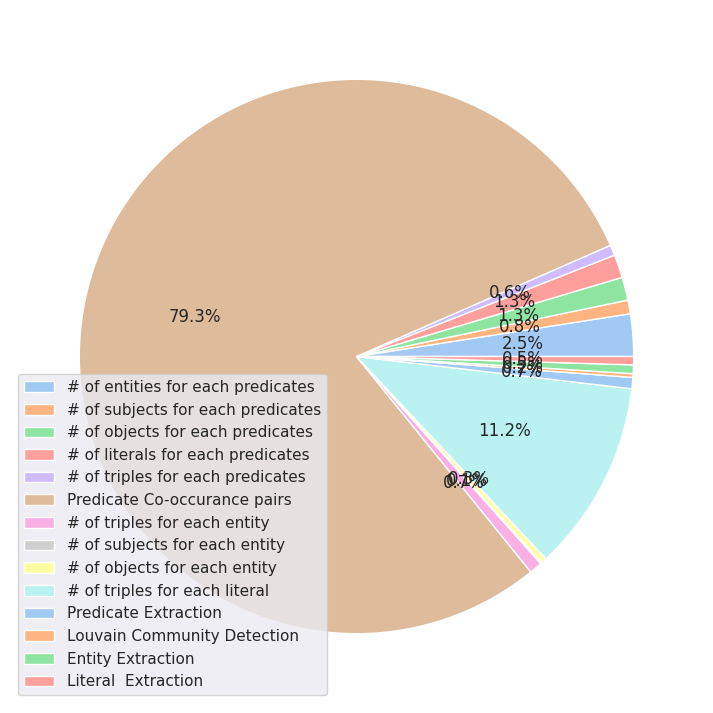

In [16]:

plot_pie(perc_data)

In [8]:
import pandas as pd
import pandas.io.formats.style as style

from feat_con_time.plot import create_latex_table

print(create_latex_table(sum_data))

\begin{table}
\label{fig:cu_feat_time}
\begin{tabular}{lr}
\toprule
Stat & Time (s) \\
\midrule
Predicate Co-occurance pairs & 37,855.89 \\
\# of triples for each literal & 1,365.83 \\
\# of entities for each predicates & 1,195.18 \\
Louvain Community Detection & 1,157.35 \\
\# of literals for each predicates & 763.43 \\
\# of objects for each predicates & 689.85 \\
\# of triples for each entity & 481.53 \\
\# of subjects for each entity & 457.76 \\
\# of subjects for each predicates & 361.38 \\
Predicate Extraction & 268.12 \\
\# of triples for each predicates & 264.93 \\
\# of objects for each entity & 241.49 \\
Literal  Extraction & 75.14 \\
Entity Extraction & 42.90 \\
\bottomrule
\end{tabular}
\end{table}



In [23]:
get_formatted_time(565312.2748790585)

(157.0, 1.0, 52.27)

In [24]:
262037.47291575087/565312.2748790585

0.46352694706975983